In [2]:
# Installing the radar chart library package

!pip install soccerplots


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import the required packages and libraries

import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [4]:
# Reading the dataset (CSV file)

df = pd.read_csv('D:\\Power BI\\Sports\\Football Pitch\\Dataset\\radars.csv')

In [5]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [6]:
# Spliting the Player name using Strings

df['Player'] = df['Player'].str.split('\\', expand=True)[0]

In [7]:
# Printing the dataset after spliting Player name

df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [8]:
# Printing all players name to find the players available in this data

df.Player.unique()

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Adrián', 'Sergio Agüero', 'Ola Aina',
       'Rayan Aït Nouri', 'Semi Ajayi', 'Nathan Aké', 'Marc Albrighton',
       'Thiago Alcántara', 'Toby Alderweireld', 'Rúnar Alex Rúnarsson',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Alisson', 'Allan',
       'Dele Alli', 'Miguel Almirón', 'Marcos Alonso', 'Steven Alzate',
       'Daniel Amartey', 'Ethan Ampadu', 'Joachim Andersen',
       'Elliot Anderson', 'Felipe Anderson', 'Michail Antonio',
       'Alphonse Areola', 'Stuart Armstrong', 'Kepa Arrizabalaga',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Charlie Austin',
       'Jordan Ayew', 'Luke Ayling', 'César Azpilicueta', 'Eric Bailly',
       'Fabián Balbuena', 'George Baldock', 'Gareth Bale',
       'Patrick Bamford', 'Phil Bardsley', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Donny van de Beek

### Filtering the data for Tammy Abraham (ST)  and Timo Werner (ST)

In [9]:
# Use reset_index to create a new dataframe

df_player = df[(df['Player'] == 'Tammy Abraham') | (df['Player'] == 'Timo Werner')]

In [10]:
# Printing the data for both strikers

df_player

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
481,482,Timo Werner,de GER,FW,Chelsea,24-361,1996,20.5,5,55,...,13.7,0,0,0,8.4,8.4,0.15,-3.4,-3.4,Matches


In [11]:
# axis=1 will help in understanding the code that we are looking for column names not the rows name

# Dropping columns that are not required for the radar chart

df_rc = df_player.drop(['Rk', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'FK', 'PK', 'PKatt', 'Matches'], axis=1)
df_rc

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
1,Tammy Abraham,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,5.6,5.6,0.18,0.4,0.4
481,Timo Werner,5,55,21,38.2,2.69,1.03,0.09,0.24,13.7,8.4,8.4,0.15,-3.4,-3.4


In [12]:
# Fetching out the parameters used for each players (excluding player name)

params = list(df_rc.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

In [13]:
print(df_rc.index)

Int64Index([1, 481], dtype='int64')


In [14]:
# Adding range of the lists of the touple pairs to find minimum and maximum values for each variable

ranges = []
a_values = []
b_values = [] # Created couple of lists to store values

for x in params: # Getting minimum and maxximum values from the parameters list
    a = min(df_rc[params][x])
    a = a - (a*.25)
    
    b = max(df_rc[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))

# Adding data of players in empty lists

row_1 = df_rc.loc[1] 
row_481 = df_rc.loc[481]

if row_1['Player'] == 'Tammy Abraham':
    a_values = row_1.values.tolist()

if row_481['Player'] == 'Timo Werner':
    b_values = row_481.values.tolist()
    
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values, b_values]

In [15]:
# Printing values stored for both players

values

[[6, 31, 13, 41.9, 2.73, 1.15, 0.19, 0.46, 9.9, 5.6, 5.6, 0.18, 0.4, 0.4],
 [5, 55, 21, 38.2, 2.69, 1.03, 0.09, 0.24, 13.7, 8.4, 8.4, 0.15, -3.4, -3.4]]

### Preparing the Chart Information

In [17]:
# Writing title for both players

title = dict(
    title_name = 'Tammy Abraham',
    title_color = 'red',
    subtitle_name = 'Chelsea (On Loan AS Roma)',
    subtitle_color = 'red',
    title_name_2 = 'Timo Werner',
    title_color_2 = 'blue',
    subtitle_name_2 = 'Chelsea',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = '@arpitc02\nData via FBREF/Statsbomb'

### Preparing and Plotting the Radar Chart

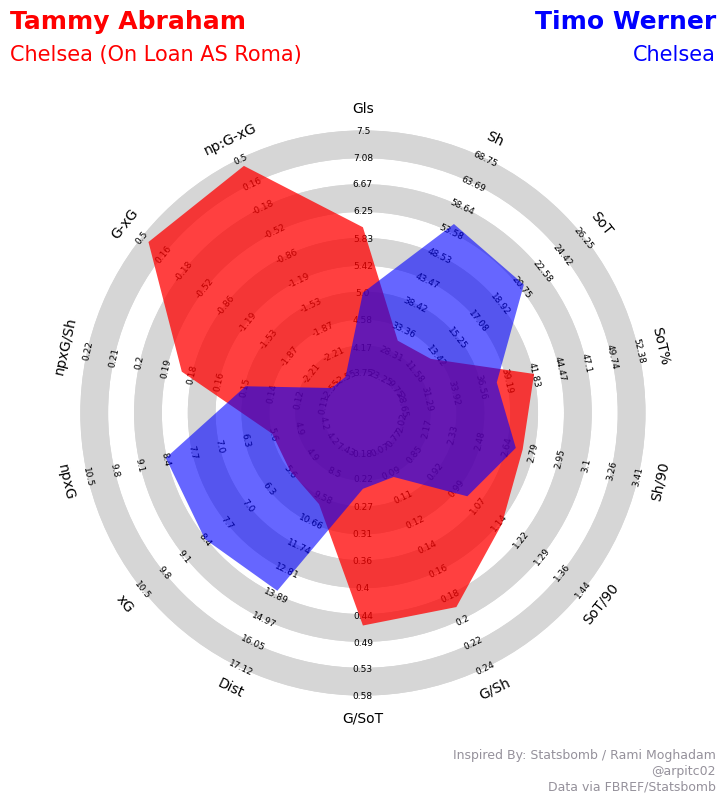

In [22]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

radar = Radar()

fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, radar_color=['red','blue'], alphas=[.75,.6],
                          title=title, endnote=endnote, compare=True)